In [642]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from itertools import cycle
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [643]:
df=pd.read_csv('Data collection4.csv')

In [644]:
df.shape

(843, 26)

In [645]:
# mode_value = df['Name'].mode()[0]  # Get the mode value (the first one if there are ties)
# df['Name'].fillna(mode_value, inplace=True)


In [646]:
# mode_value = df['Which type of stress do you primarily experience?'].mode()[0]  # Get the mode value (the first one if there are ties)
# df['Which type of stress do you primarily experience?'].fillna(mode_value, inplace=True)


In [647]:
# df.drop(['Email Address','Roll Number','Branch'],axis=1,inplace=True)  

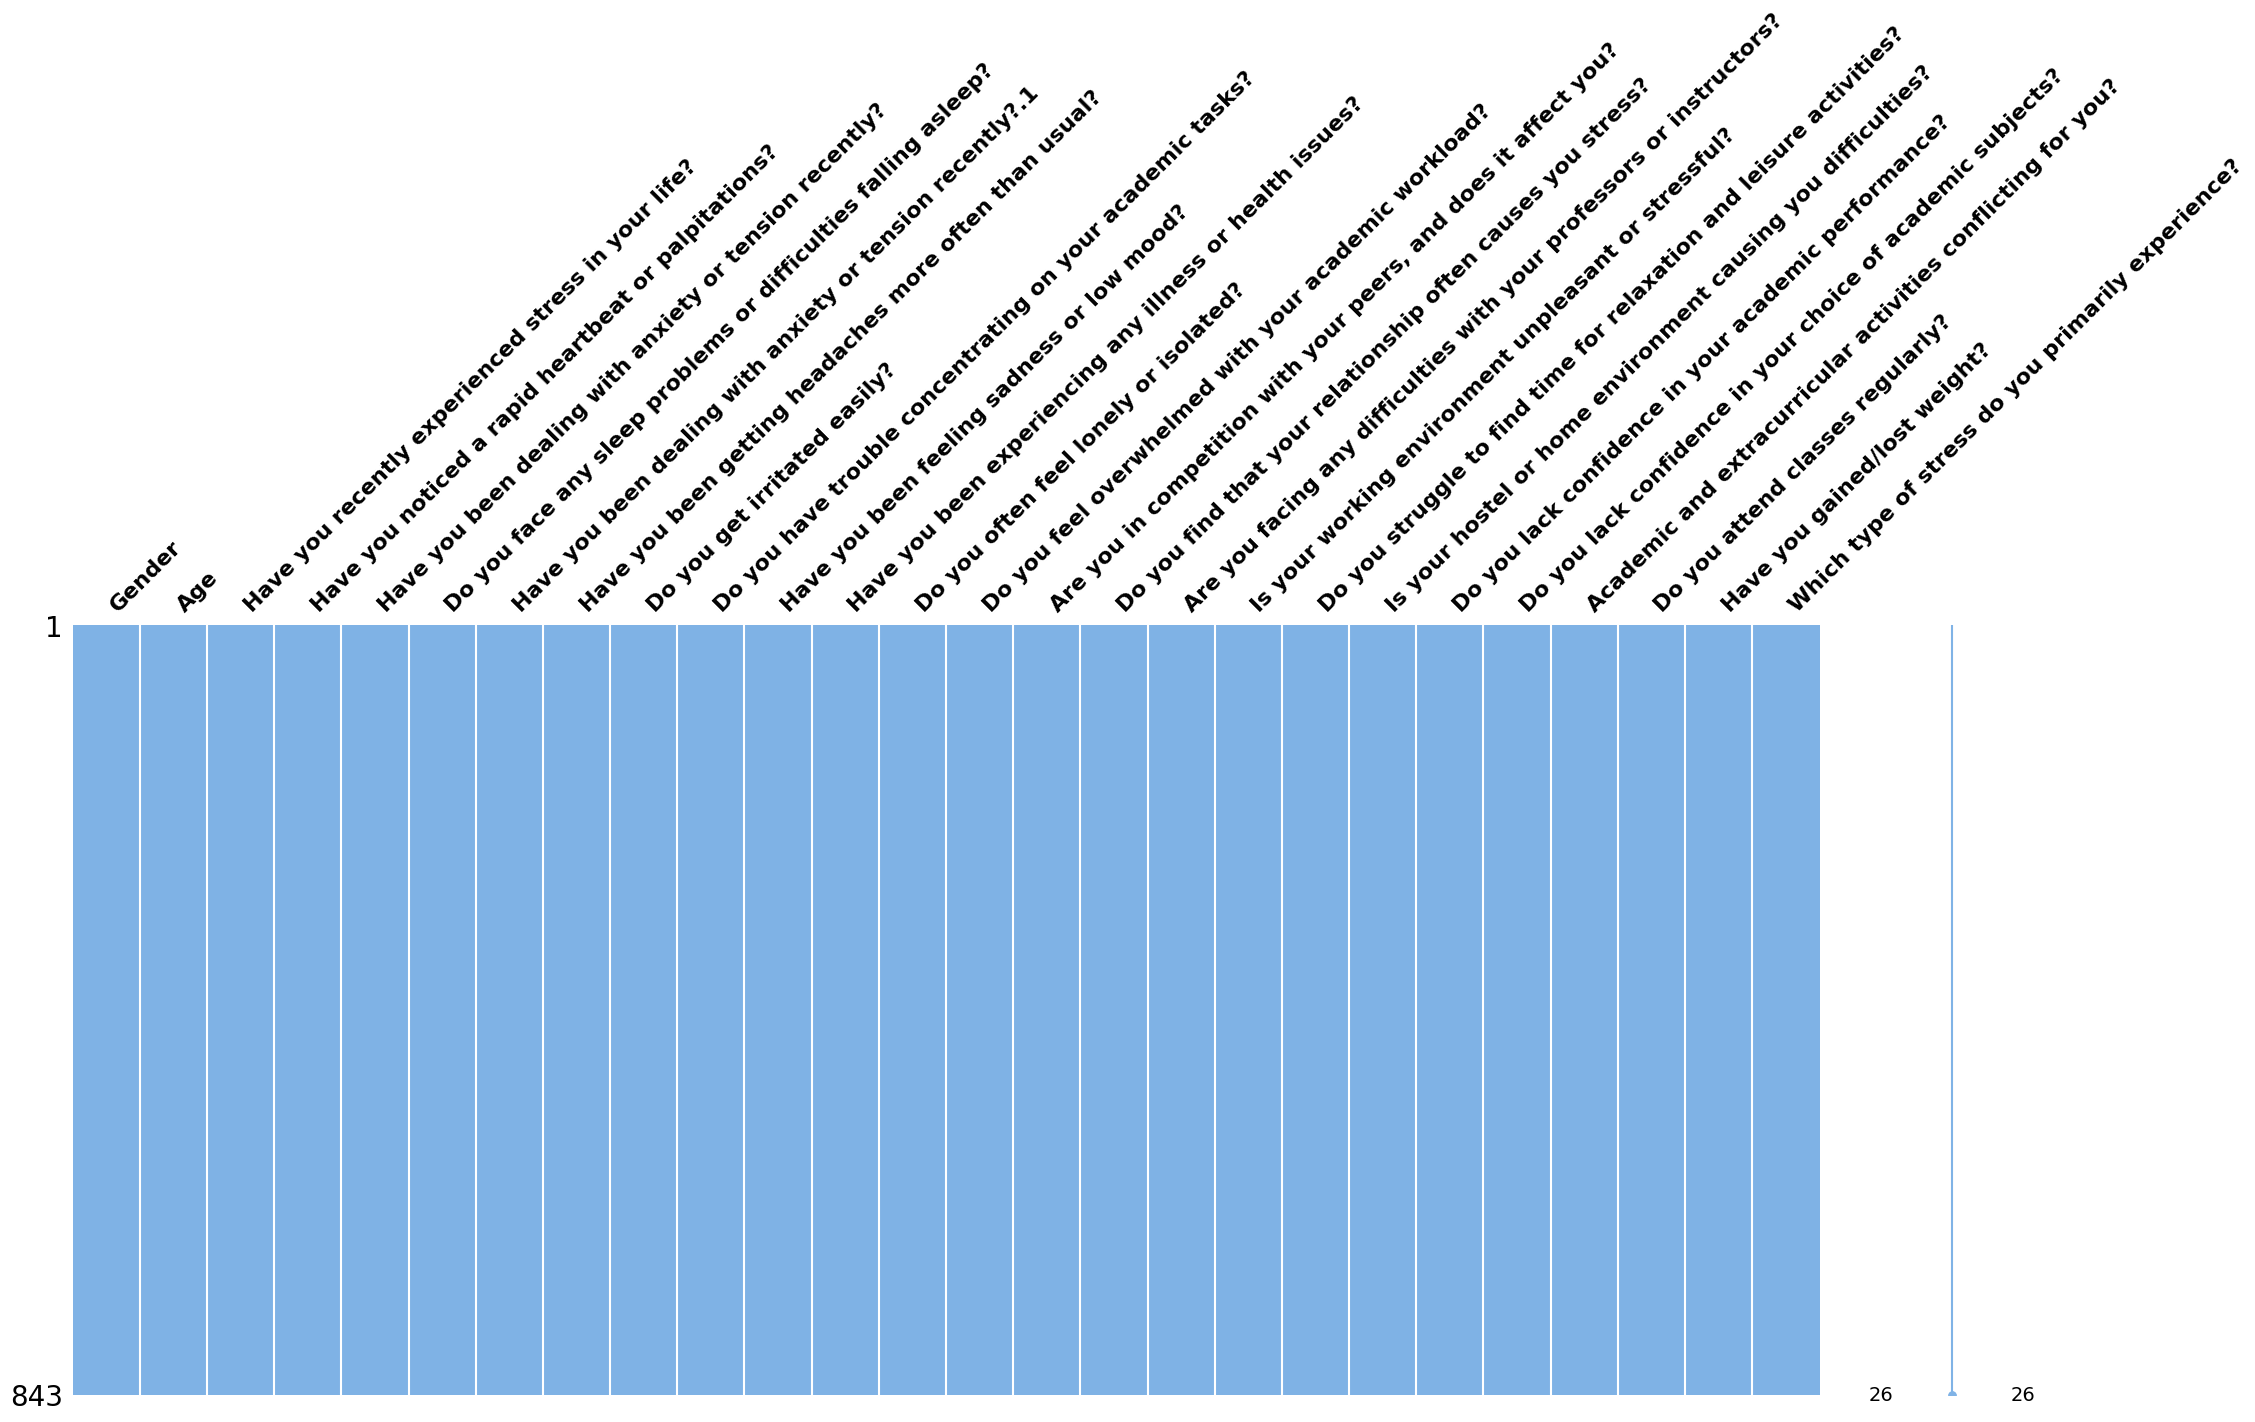

In [648]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
ax = msno.matrix(df, color=(0.5, 0.7, 0.9))  # Adjust the RGB tuple for your preferred color

# Make the column names bold
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')

# Show the plot
plt.show()

In [649]:
# pd.set_option("display.max_rows", None)  # Show all rows
# pd.set_option("display.max_columns", None)  # Show all columns

In [650]:
# row_numbers = [7, 37, 45, 55, 67, 68, 70, 76, 106, 116, 122, 134, 141, 150, 155]

# # Print the 'Name' values for the specified row numbers
# for row_number in row_numbers:
#     name = df.loc[row_number, 'Name (Anonymous)']
#     print(f'Row {row_number}: {name}')

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


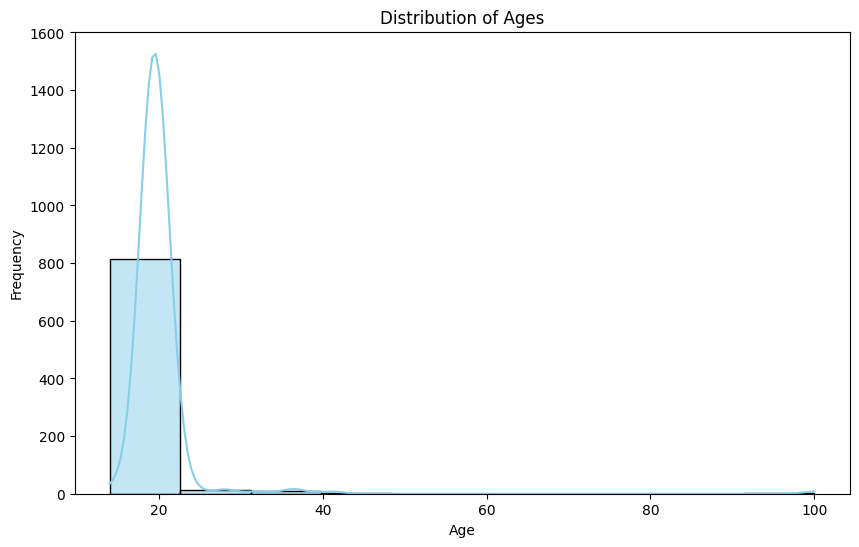

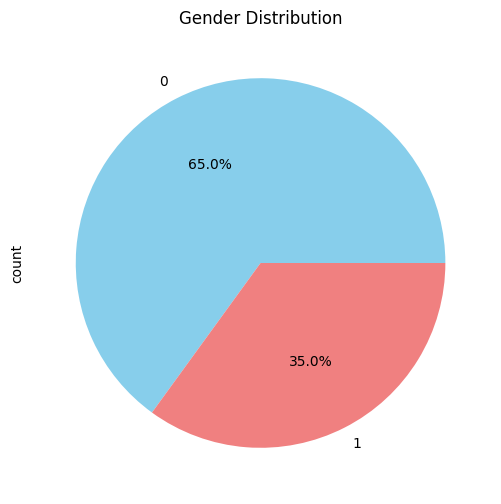

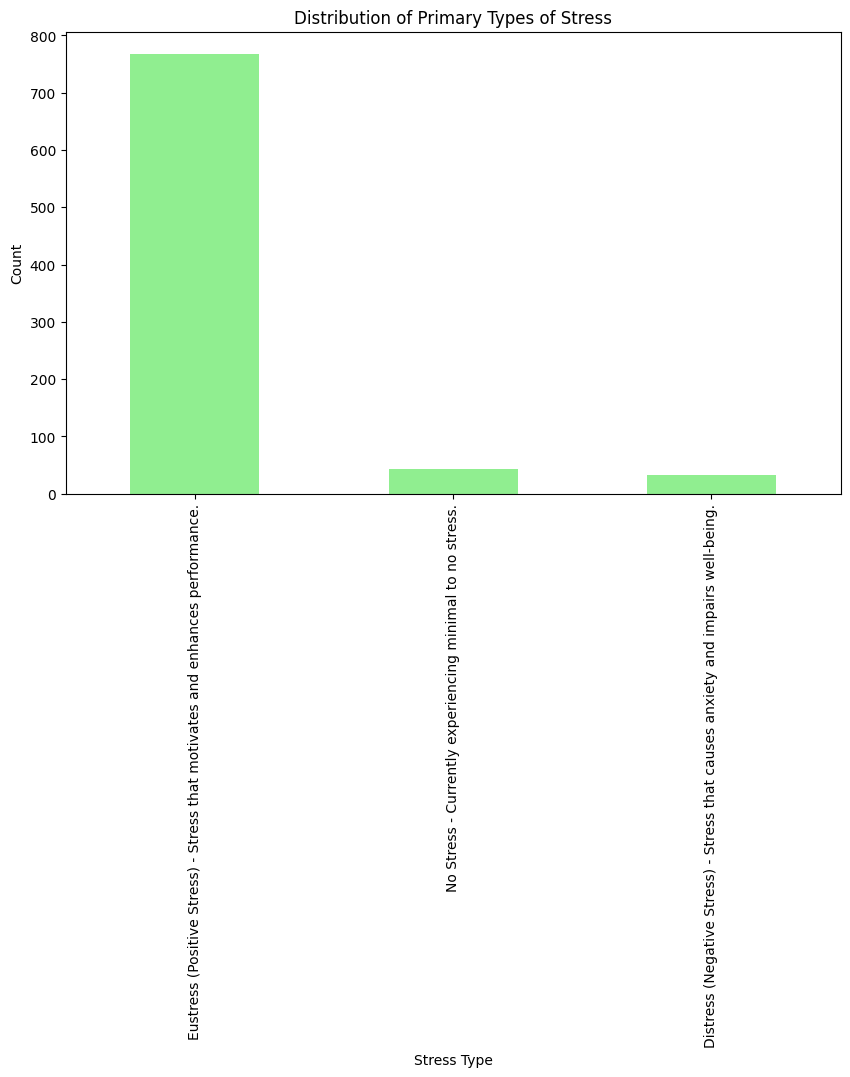

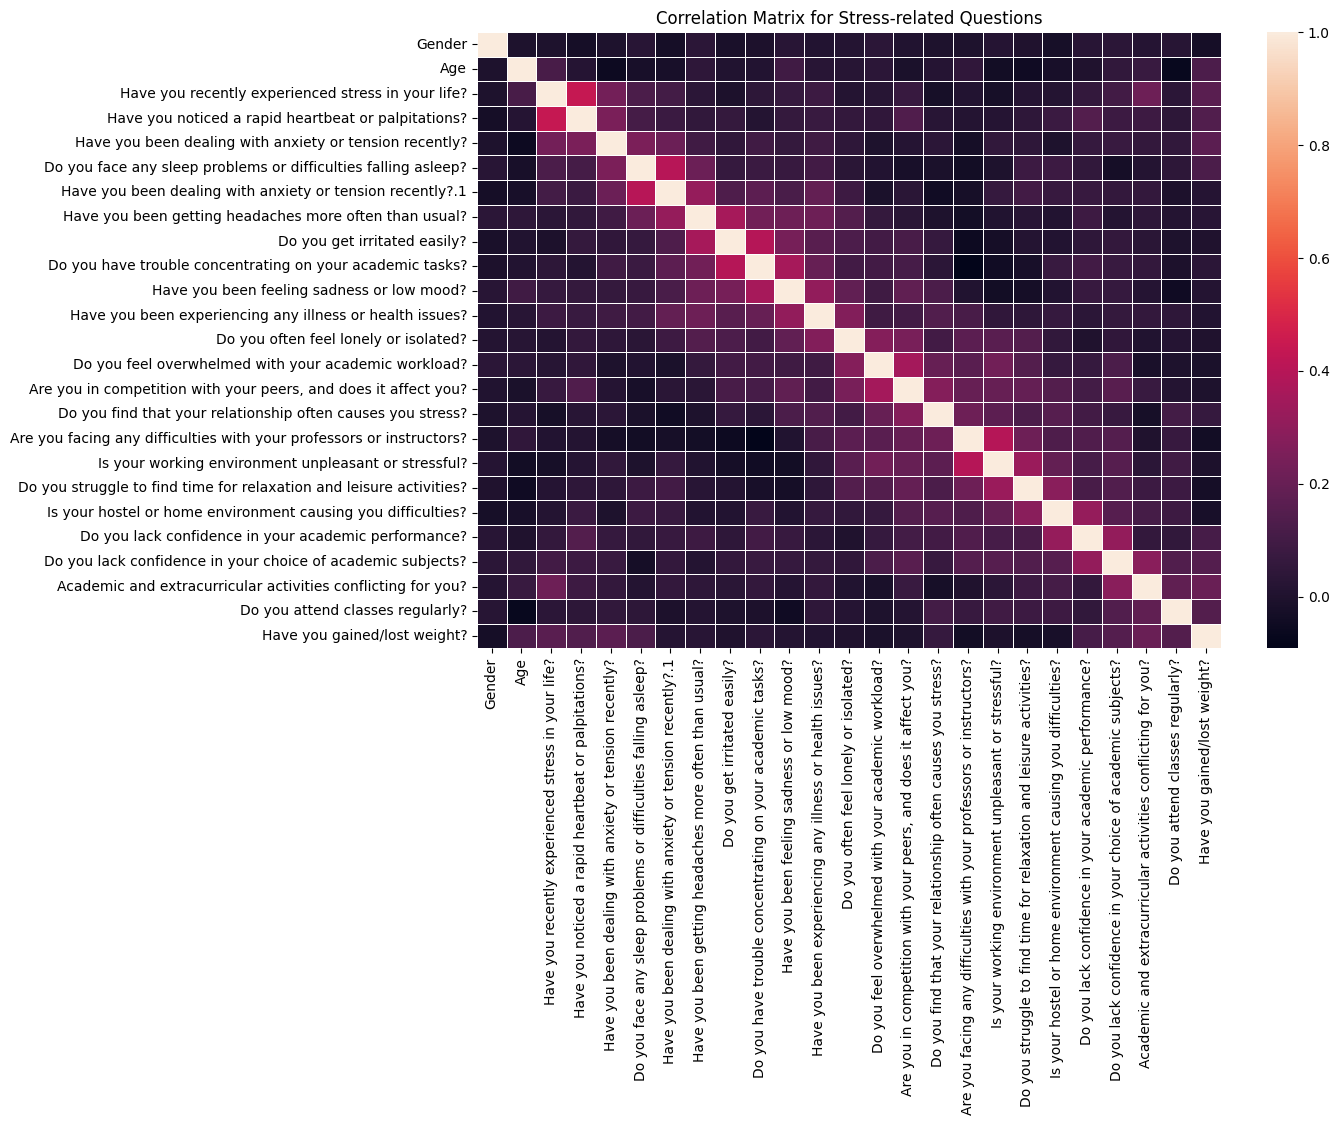

In [651]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# If not, replace 'df' with the actual variable name holding your DataFrame

# Visualize the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the gender distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

# Visualize the distribution of the primary types of stress
plt.figure(figsize=(10, 6))
df['Which type of stress do you primarily experience?'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Primary Types of Stress')
plt.xlabel('Stress Type')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix for stress-related questions
stress_columns = df.columns[0:-1]  # Exclude 'Gender', 'Age', and 'Which type of stress do you primarily experience?' columns
stress_data = df[stress_columns]
plt.figure(figsize=(12, 8))
sns.heatmap(stress_data.corr(), annot=False,  linewidths=.5)
plt.title('Correlation Matrix for Stress-related Questions')
plt.show()


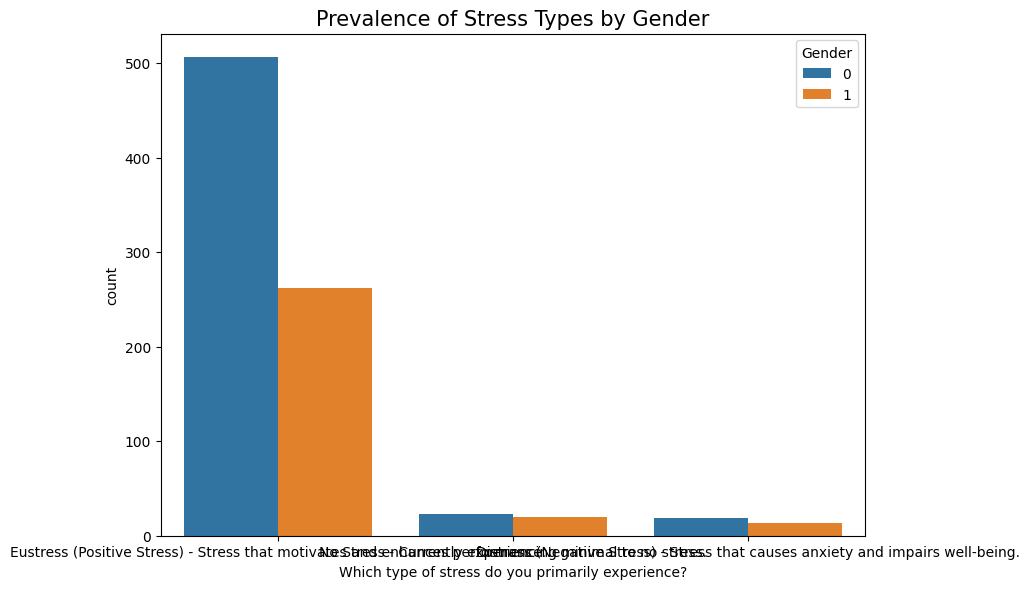

In [652]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))
plt.subplots_adjust()

plt.subplot(4, 2, 1)
plt.title('Prevalence of Stress Types by Gender', fontsize=15)
sns.countplot(data=df, x='Which type of stress do you primarily experience?', hue='Gender')

plt.show()


In [653]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [654]:
df.shape

(843, 26)

In [655]:
df.isnull().sum()

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [656]:
# df.drop(['Timestamp','Name'],axis=1,inplace=True)  

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

In [658]:
# category_mapping = {
#     "Not at all": 1,
#     "A little bit": 2,
#     "Moderate": 3,
#     "Very much": 4,
#     "Extremely": 5,
# }

# columns_to_convert = [col for col in df.columns if col not in ["Gender", "Age","Which type of stress do you primarily experience?"]]

# # Use the map function to replace text with numbers in specified columns
# df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.map(category_mapping) if x.name in columns_to_convert else x)
# df[columns_to_convert] = df[columns_to_convert].fillna(-1)
# df[columns_to_convert] = df[columns_to_convert].astype(int)


In [659]:
# gender_mapping = {
#     "Male": 0,
#     "Female": 1,
# }

# # Use the map function to replace gender with numerical values
# df["Gender"] = df["Gender"].map(gender_mapping)

In [660]:
df.head()   

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [661]:
# columns_to_exclude = ["Age", "Gender","Which type of stress do you primarily experience?","Timestamp","Name"]

# # Calculate the row-wise average for all other columns
# df['Stress_Score'] = df[df.columns.difference(columns_to_exclude)].mean(axis=1)

In [663]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [664]:
#  df.drop(['Stress_Score'],axis=1,inplace=True) 

In [665]:
df.isnull().sum()

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [667]:
# df = df.dropna()
# df.shape

In [670]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [671]:
df['Which type of stress do you primarily experience?'].value_counts()

Which type of stress do you primarily experience?
Eustress (Positive Stress) - Stress that motivates and enhances performance.       768
No Stress - Currently experiencing minimal to no stress.                            43
Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.     32
Name: count, dtype: int64

In [672]:
# Assuming df is your DataFrame
df['Distress'] = (df['Which type of stress do you primarily experience?'] == "Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.").astype(int)
df['Eustress'] = (df['Which type of stress do you primarily experience?'] == "Eustress (Positive Stress) - Stress that motivates and enhances performance.").astype(int)


In [673]:
df['Distress'].value_counts()

Distress
0    811
1     32
Name: count, dtype: int64

In [674]:
df['Eustress'].value_counts()

Eustress
1    768
0     75
Name: count, dtype: int64

In [677]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?,Distress,Eustress
0,0,20,3,4,2,5,1,2,1,2,...,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...,0,1
1,0,20,2,3,2,1,1,1,1,4,...,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...,0,1
2,0,20,5,4,2,2,1,3,4,2,...,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...,0,1
3,1,20,3,4,3,2,2,3,4,3,...,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...,0,1
4,0,20,3,3,3,2,2,4,4,4,...,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...,0,1


In [678]:
df.drop(['Which type of stress do you primarily experience?'],axis=1,inplace=True)  

In [679]:
df1=df.copy()
# df1 = df1[df1['Eustress'] != 2]

In [680]:
x = df.drop(["Distress","Eustress"], axis=1)
x1=df1.drop(["Distress","Eustress"], axis=1)
y1 = df["Distress"]
y2 = df1["Eustress"]

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.5, random_state=42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y2, test_size=0.5, random_state=42)

In [681]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape    

((421, 25), (422, 25), (421,), (422,))

In [682]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape    

((421, 25), (422, 25), (421,), (422,))

In [683]:
y_test.value_counts()

Distress
0    407
1     15
Name: count, dtype: int64

In [684]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 95.97%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       407
           1       0.38      0.20      0.26        15

    accuracy                           0.96       422
   macro avg       0.67      0.59      0.62       422
weighted avg       0.95      0.96      0.95       422



In [685]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = clf.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 89.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.20      0.25        35
           1       0.93      0.96      0.95       387

    accuracy                           0.90       422
   macro avg       0.62      0.58      0.60       422
weighted avg       0.88      0.90      0.89       422



In [686]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 97.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       407
           1       0.88      0.47      0.61        15

    accuracy                           0.98       422
   macro avg       0.93      0.73      0.80       422
weighted avg       0.98      0.98      0.98       422



Accuracy: 91.71%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.92      1.00      0.96       387

    accuracy                           0.92       422
   macro avg       0.46      0.50      0.48       422
weighted avg       0.84      0.92      0.88       422

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.92      1.00      0.96       387

    accuracy                           0.92       422
   macro avg       0.46      0.50      0.48       422
weighted avg       0.84      0.92      0.88       422



C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: U

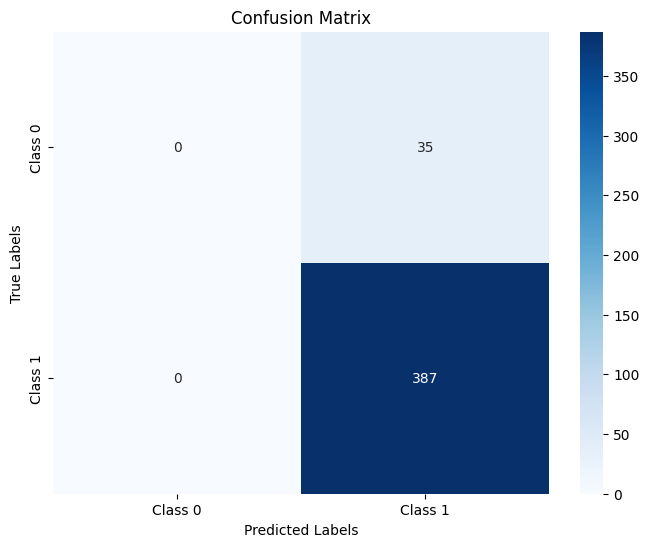

In [687]:
knn = KNeighborsClassifier(n_neighbors=50)

# Train the KNN classifier on the training data
knn.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = knn.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

# Generate a classification report without target_names
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test1, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

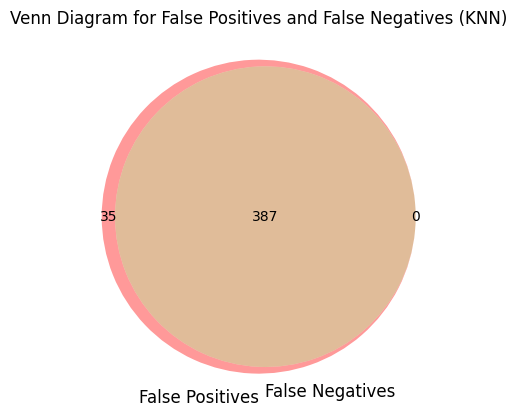

In [688]:

from matplotlib_venn import venn2

# Replace 'y_true' and 'y_pred' with your actual data

# Create confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# Extract values from the confusion matrix
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]

# Create a Venn diagram
venn2(subsets=(false_positives, false_negatives, true_positives),
      set_labels=('False Positives', 'False Negatives'))

plt.title('Venn Diagram for False Positives and False Negatives (KNN)')
plt.show()

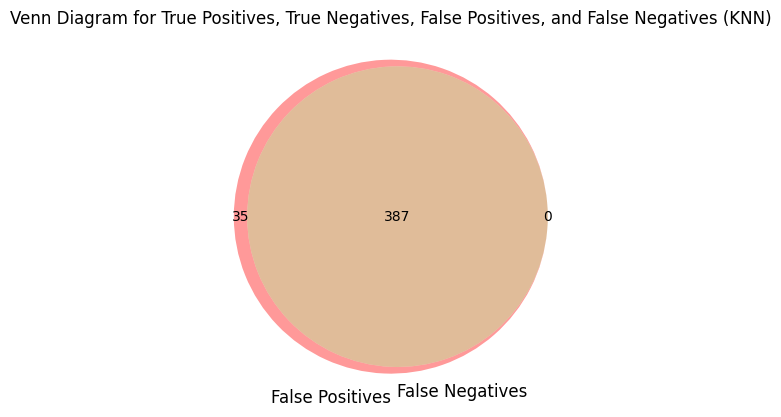

In [689]:
from matplotlib_venn import venn2

# Replace 'y_true' and 'y_pred' with your actual data

# Create confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# Extract values from the confusion matrix
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_negatives = cm[0, 0]

# Create a Venn diagram
venn2(subsets=(false_positives, false_negatives, true_positives, true_negatives),
      set_labels=('False Positives', 'False Negatives'))

plt.title('Venn Diagram for True Positives, True Negatives, False Positives, and False Negatives (KNN)')
plt.show()


In [690]:
# Create a Logistic Regression classifier
logistic_reg = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
logistic_reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logistic_reg.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report without target_names
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 98.82%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       407
           1       0.86      0.80      0.83        15

    accuracy                           0.99       422
   macro avg       0.92      0.90      0.91       422
weighted avg       0.99      0.99      0.99       422



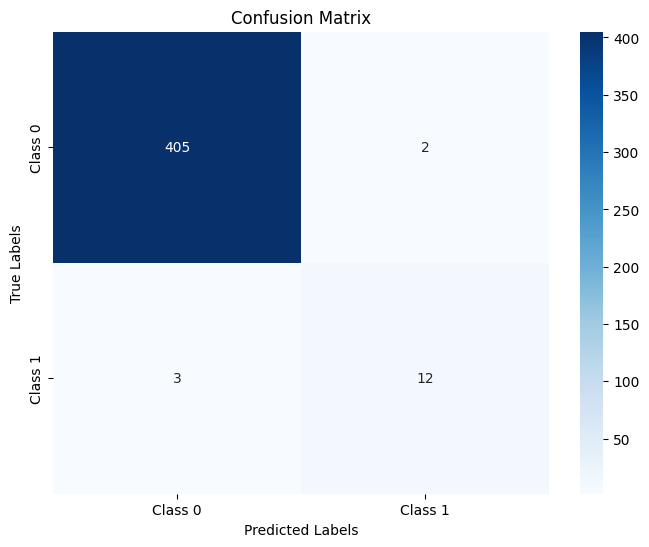

In [691]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

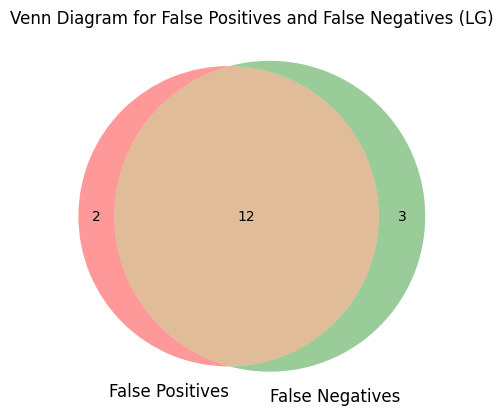

In [692]:

from matplotlib_venn import venn2

# Replace 'y_true' and 'y_pred' with your actual data

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_positives = cm[1, 1]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]

# Create a Venn diagram
venn2(subsets=(false_positives, false_negatives, true_positives),
      set_labels=('False Positives', 'False Negatives'))

plt.title('Venn Diagram for False Positives and False Negatives (LG)')
plt.show()

In [693]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape    

((421, 25), (422, 25), (421,), (422,))

In [694]:
y_test.value_counts()

Distress
0    407
1     15
Name: count, dtype: int64

In [695]:
y_pred_counts = np.bincount(y_pred)
y_pred_counts

array([408,  14], dtype=int64)

In [696]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgboost_classifier = XGBClassifier(n_estimators=50, max_depth=1, random_state=42)

# Train the classifier on the training data
xgboost_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgboost = xgboost_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"XGBoost Accuracy: {accuracy_xgboost * 100:.2f}%")

# Generate a classification report for XGBoost
report_xgboost = classification_report(y_test, y_pred_xgboost)
print("XGBoost Classification Report:\n", report_xgboost)


XGBoost Accuracy: 97.16%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       407
           1       1.00      0.20      0.33        15

    accuracy                           0.97       422
   macro avg       0.99      0.60      0.66       422
weighted avg       0.97      0.97      0.96       422



In [697]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgboost_classifier = XGBClassifier(n_estimators=50, max_depth=1, random_state=42)

# Train the classifier on the training data
xgboost_classifier.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred_xgboost = xgboost_classifier.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy_xgboost = accuracy_score(y_test1, y_pred_xgboost)
print(f"XGBoost Accuracy: {accuracy_xgboost * 100:.2f}%")

# Generate a classification report for XGBoost
report_xgboost = classification_report(y_test1, y_pred_xgboost)
print("XGBoost Classification Report:\n", report_xgboost)


XGBoost Accuracy: 91.47%
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.06      0.10        35
           1       0.92      0.99      0.96       387

    accuracy                           0.91       422
   macro avg       0.66      0.52      0.53       422
weighted avg       0.88      0.91      0.88       422



In [698]:
# Create a Logistic Regression classifier
logistic_reg = LogisticRegression(max_iter=1000)

# Train the classifier on the training data
logistic_reg.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = logistic_reg.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report without target_names
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 91.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.92      1.00      0.96       387

    accuracy                           0.91       422
   macro avg       0.46      0.50      0.48       422
weighted avg       0.84      0.91      0.88       422



In [699]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 96.92%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       407
           1       0.75      0.20      0.32        15

    accuracy                           0.97       422
   macro avg       0.86      0.60      0.65       422
weighted avg       0.96      0.97      0.96       422



In [700]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 92.18%
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.09      0.15        35
           1       0.92      1.00      0.96       387

    accuracy                           0.92       422
   macro avg       0.84      0.54      0.56       422
weighted avg       0.91      0.92      0.89       422



In [701]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 98.82%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       407
           1       0.86      0.80      0.83        15

    accuracy                           0.99       422
   macro avg       0.92      0.90      0.91       422
weighted avg       0.99      0.99      0.99       422



In [702]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 91.71%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.92      1.00      0.96       387

    accuracy                           0.92       422
   macro avg       0.46      0.50      0.48       422
weighted avg       0.84      0.92      0.88       422



C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: U

In [703]:
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 98.34%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       407
           1       0.72      0.87      0.79        15

    accuracy                           0.98       422
   macro avg       0.86      0.93      0.89       422
weighted avg       0.99      0.98      0.98       422



In [704]:
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = nb_classifier.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 84.83%
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.34      0.27        35
           1       0.94      0.89      0.92       387

    accuracy                           0.85       422
   macro avg       0.58      0.62      0.59       422
weighted avg       0.88      0.85      0.86       422



In [705]:
# Create an AdaBoost classifier with a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can choose a different base classifier if needed
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 97.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       407
           1       0.88      0.47      0.61        15

    accuracy                           0.98       422
   macro avg       0.93      0.73      0.80       422
weighted avg       0.98      0.98      0.98       422



In [706]:
# Create an AdaBoost classifier with a base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can choose a different base classifier if needed
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the classifier on the training data
adaboost_classifier.fit(x_train1, y_train1)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(x_test1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
report = classification_report(y_test1, y_pred)
print("Classification Report:\n", report)

Accuracy: 87.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.11      0.13        35
           1       0.92      0.94      0.93       387

    accuracy                           0.87       422
   macro avg       0.54      0.53      0.53       422
weighted avg       0.86      0.87      0.87       422

